In [209]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import timedelta
from time import time
%matplotlib inline

In [210]:
f = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\share-of-land-area-used-for-agriculture.csv", parse_dates = True)

In [211]:
f =f.loc[f['Code'] == 'SAU']

In [212]:
f = f[['Year' ,"Agricultural land (% of land area)"]]

In [213]:
f.head()

,Year,Agricultural land (% of land area)
9416,1961,40.084850
9417,1962,40.094154
9418,1963,40.104385
9419,1964,40.117878
9420,1965,40.127647


In [214]:
x = f.loc[:,['Year']]

In [215]:
y = f.loc[:,["Agricultural land (% of land area)"]]

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [217]:
regr = LinearRegression()

regr.fit(x_train, y_train)

pred = regr.predict(x_test)

print('Coff:', regr.coef_)
print('Intercept:', regr.intercept_)

print('MSE:', mean_squared_error(y_test, pred))
print('r2_score:', r2_score(y_test, pred))

Coff: [[1.00027367]]
Intercept: [-1930.44853121]
MSE: 43.695179964683206
r2_score: 0.8365420889047245


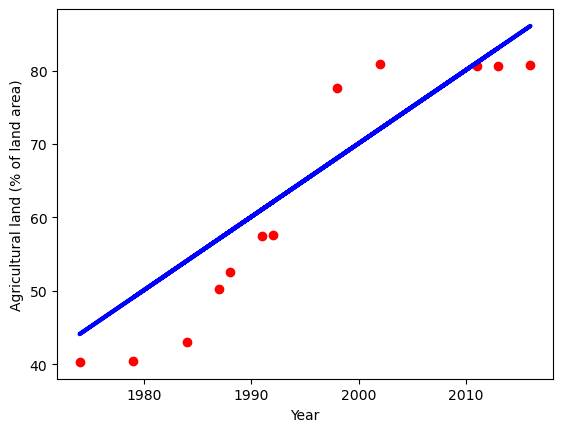

In [220]:
plt.scatter(x_test, y_test, color='red')
plt.xlabel('Year')
plt.ylabel('Agricultural land (% of land area)')
plt.plot(x_test, pred, color = 'blue', linewidth=3)

plt.show()